In [131]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from sklearn import metrics
import numpy as np 
import matplotlib.pyplot as plt
import category_encoders as ce
%matplotlib inline
import pickle
from datetime import datetime
from pickle import dump
import mlflow
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
import warnings
warnings.filterwarnings("ignore")
np.random.seed(40)
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from urllib.parse import urlparse
import mlflow
import mlflow.sklearn

In [133]:
train_data = pd.read_csv('../data/train_data.csv')
print(len(train_data))
train_data.head()

1017209


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,month,day_of_month
0,1,5,2015-07-31,5263.0,555.0,1,1,0,1,c,a,1270.0,9.0,2008.0,0,unknown,unknown,unknown,7,31
1,2,5,2015-07-31,6064.0,625.0,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",7,31
2,3,5,2015-07-31,8314.0,821.0,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",7,31
3,4,5,2015-07-31,13995.0,609.0,1,1,0,1,c,c,620.0,9.0,2009.0,0,unknown,unknown,unknown,7,31
4,5,5,2015-07-31,4822.0,559.0,1,1,0,1,a,a,2330.0,4.0,2015.0,0,unknown,unknown,unknown,7,31


In [134]:
na_values = ['unknown']
df=pd.read_csv('../data/train_data.csv',na_values= na_values, keep_default_na = False)
df.shape

(1017209, 20)

In [135]:
new_df = df.dropna()

In [136]:
new_df.shape

(324326, 20)

In [137]:
new_df.head(2)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,month,day_of_month
1,2,5,2015-07-31,6064.0,625.0,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",7,31
2,3,5,2015-07-31,8314.0,821.0,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",7,31


In [138]:
new_df.transform(pd.to_numeric, errors = 'ignore')
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 324326 entries, 1 to 1017204
Data columns (total 20 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Store                      324326 non-null  int64  
 1   DayOfWeek                  324326 non-null  int64  
 2   Date                       324326 non-null  object 
 3   Sales                      324326 non-null  float64
 4   Customers                  324326 non-null  float64
 5   Open                       324326 non-null  int64  
 6   Promo                      324326 non-null  int64  
 7   StateHoliday               324326 non-null  object 
 8   SchoolHoliday              324326 non-null  int64  
 9   StoreType                  324326 non-null  object 
 10  Assortment                 324326 non-null  object 
 11  CompetitionDistance        324326 non-null  float64
 12  CompetitionOpenSinceMonth  324326 non-null  float64
 13  CompetitionOpenSinceYear   3

In [139]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
enc.fit(new_df['PromoInterval'])
new_df['PromoInterval'] = enc.transform(new_df['PromoInterval'])
new_df.head(2)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,month,day_of_month
1,2,5,2015-07-31,6064.0,625.0,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,1,7,31
2,3,5,2015-07-31,8314.0,821.0,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,1,7,31


In [140]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
enc.fit(new_df['Assortment'])
new_df['Assortment'] = enc.transform(new_df['Assortment'])

In [141]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
enc.fit(new_df['StoreType'])
new_df['StoreType'] = enc.transform(new_df['StoreType'])

In [142]:
new_df.StateHoliday.value_counts()

0    188500
0    125414
a      6974
b      2190
c      1248
Name: StateHoliday, dtype: int64

In [143]:
new_df = new_df[new_df.StateHoliday != 0]
new_df.shape

(198912, 20)

In [144]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
enc.fit(new_df['StateHoliday'])
new_df['StateHoliday'] = enc.transform(new_df['StateHoliday'])

In [145]:
new_df.head(5)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,month,day_of_month
32768,434,4,2015-07-02,10778.0,691.0,1,1,0,0,0,0,13020.0,8.0,2003.0,1,40.0,2014.0,1,7,2
32774,440,4,2015-07-02,5649.0,649.0,1,1,0,0,2,0,3900.0,4.0,2005.0,1,45.0,2009.0,0,7,2
32780,446,4,2015-07-02,5303.0,614.0,1,1,0,1,0,0,340.0,10.0,2000.0,1,31.0,2013.0,0,7,2
32783,449,4,2015-07-02,10479.0,609.0,1,1,0,0,0,1,120.0,12.0,2014.0,1,37.0,2009.0,1,7,2
32784,450,4,2015-07-02,12088.0,1332.0,1,1,0,0,1,0,5780.0,11.0,1994.0,1,10.0,2014.0,2,7,2


In [146]:
new_df.Date = pd.to_datetime(new_df["Date"])
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 198912 entries, 32768 to 1017204
Data columns (total 20 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Store                      198912 non-null  int64         
 1   DayOfWeek                  198912 non-null  int64         
 2   Date                       198912 non-null  datetime64[ns]
 3   Sales                      198912 non-null  float64       
 4   Customers                  198912 non-null  float64       
 5   Open                       198912 non-null  int64         
 6   Promo                      198912 non-null  int64         
 7   StateHoliday               198912 non-null  int32         
 8   SchoolHoliday              198912 non-null  int64         
 9   StoreType                  198912 non-null  int32         
 10  Assortment                 198912 non-null  int32         
 11  CompetitionDistance        198912 non-null  flo

In [147]:
# standardize the data
from sklearn.preprocessing import StandardScaler


new_numerical = [] #this leaves out the categorical columns that were encoded but not replaced
for col in new_df.columns:
    if new_df[col].dtype in ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']:
        new_numerical.append(col)
        
num = new_df[new_numerical].copy()
num = num.drop(['Store'], axis = 1) #drop the id col
scaler = StandardScaler()
scaled_data = scaler.fit_transform(num)

In [148]:
scaled_data.shape

(198912, 18)

<h1>Building models with sklearn pipelines
    <h2>Random forests Regressor

In [149]:
## separate the independent and target variable 
X = new_df.drop(['Customers', 'Sales', 'Date'], axis = 1)
y = new_df['Sales']

In [150]:
# Splitting our dataset into train and test subsets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
print ("Training and testing split was successful.")

Training and testing split was successful.


In [151]:
# Define the Pipeline
model_pipeline = Pipeline(steps=[('random_forest', RandomForestRegressor(max_depth=10,random_state=2))])

In [152]:
model = RandomForestRegressor()

In [153]:
import pandas as pd 
pd.DataFrame(new_df).to_csv("../data/new_df.csv")
new_df.head(5)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,month,day_of_month
32768,434,4,2015-07-02,10778.0,691.0,1,1,0,0,0,0,13020.0,8.0,2003.0,1,40.0,2014.0,1,7,2
32774,440,4,2015-07-02,5649.0,649.0,1,1,0,0,2,0,3900.0,4.0,2005.0,1,45.0,2009.0,0,7,2
32780,446,4,2015-07-02,5303.0,614.0,1,1,0,1,0,0,340.0,10.0,2000.0,1,31.0,2013.0,0,7,2
32783,449,4,2015-07-02,10479.0,609.0,1,1,0,0,0,1,120.0,12.0,2014.0,1,37.0,2009.0,1,7,2
32784,450,4,2015-07-02,12088.0,1332.0,1,1,0,0,1,0,5780.0,11.0,1994.0,1,10.0,2014.0,2,7,2


In [154]:
print(X.shape, y.shape)

(198912, 17) (198912,)


In [155]:
training_ = new_df.drop('Date', axis=1)

In [156]:
# Create evaluation function (the competition uses RMSLE)
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

def rmsle(y_test, y_preds):
    """
    Caculates root mean squared log error between predictions and
    true labels.
    """
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

# Create function to evaluate model on a few different levels
def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_valid)
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
              "Valid MAE": mean_absolute_error(y_valid, val_preds),
              "Training RMSLE": rmsle(y_train, train_preds),
              "Valid RMSLE": rmsle(y_valid, val_preds),
              "Training R^2": r2_score(y_train, train_preds),
              "Valid R^2": r2_score(y_valid, val_preds)}
    return scores

In [157]:
# Change max_samples value
model = RandomForestRegressor(n_jobs=-1,
                              random_state=42,
                              min_samples_leaf=10000)

In [158]:
model.fit(X_train, y_train)

RandomForestRegressor(min_samples_leaf=10000, n_jobs=-1, random_state=42)

In [159]:
show_scores(model)

{'Training MAE': 1356.4144530575124,
 'Valid MAE': 1364.6069517147023,
 'Training RMSLE': 0.3208317230208803,
 'Valid RMSLE': 0.3239140685237053,
 'Training R^2': 0.6673872519616326,
 'Valid R^2': 0.6653318237013113}

In [160]:
%%time
from sklearn.model_selection import RandomizedSearchCV

# Different RandomForestRegressor hyperparameters
rf_grid = {"n_estimators": np.arange(10, 100, 10),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1, "sqrt", "auto"]}

# Instantiate RandomizedSearchCV model
rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,
                                                    random_state=42),
                              param_distributions=rf_grid,
                              n_iter=2,
                              cv=2,
                              verbose=True)

# Fit the RandomizedSearchCV model
rs_model.fit(X_train, y_train)

Fitting 2 folds for each of 2 candidates, totalling 4 fits
CPU times: total: 18.7 s
Wall time: 1min 37s


RandomizedSearchCV(cv=2,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=2,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [161]:
# Find the best model hyperparameters
rs_model.best_params_

{'n_estimators': 80,
 'min_samples_split': 2,
 'min_samples_leaf': 7,
 'max_features': 'sqrt',
 'max_depth': 10}

In [162]:
# Evaluate the RandomizedSearch model
show_scores(rs_model)

{'Training MAE': 1069.4888798350669,
 'Valid MAE': 1084.8863458930814,
 'Training RMSLE': 1.0498119082121125,
 'Valid RMSLE': 1.0436340754389397,
 'Training R^2': 0.7908408837316027,
 'Valid R^2': 0.7857679753381546}

In [163]:
%%time

# Most ideal hyperparamters
ideal_model = RandomForestRegressor(n_estimators=40,
                                    min_samples_leaf=1,
                                    min_samples_split=14,
                                    max_features=0.5,
                                    n_jobs=-1,
                                    random_state=42) # random state so our results are reproducible

# Fit the ideal model
ideal_model.fit(X_train, y_train)

CPU times: total: 17.8 s
Wall time: 8.22 s


RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=40,
                      n_jobs=-1, random_state=42)

In [164]:
# Scores for ideal_model (trained on all the data)
show_scores(ideal_model)

{'Training MAE': 465.6899556127314,
 'Valid MAE': 578.6766837999273,
 'Training RMSLE': 0.17974672448981496,
 'Valid RMSLE': 0.23507248442277306,
 'Training R^2': 0.9469994961925928,
 'Valid R^2': 0.9174481665749394}

In [165]:
# Scores on rs_model (only trained on ~10,000 examples)
show_scores(rs_model)

{'Training MAE': 1069.4888798350669,
 'Valid MAE': 1084.8863458930814,
 'Training RMSLE': 1.0498119082121125,
 'Valid RMSLE': 1.0436340754389397,
 'Training R^2': 0.7908408837316027,
 'Valid R^2': 0.7857679753381546}

In [166]:
# saving the model 
import pickle 
pickle_out = open("ideal_model.pkl", mode = "wb") 
pickle.dump(model, pickle_out) 
pickle_out.close()

In [167]:
test_data = pd.read_csv('../data/test_data.csv')
test_data.head(2)

,Open,CompetitionDistance,StateHoliday,StoreType,Assortment,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Id,Store,DayOfWeek,Date,Promo,SchoolHoliday,Promo2,month,day_of_month
0,1.0,1270.0,0,c,a,9.0,2008.0,unknown,unknown,unknown,1,1,4,2015-07-31,1,0,0,7,31
1,1.0,14130.0,0,a,a,12.0,2006.0,14.0,2011.0,"Jan,Apr,Jul,Oct",2,3,4,2015-07-31,1,0,1,7,31


In [168]:
na_values = ['unknown']
test_data=pd.read_csv('../data/test_data.csv',na_values= na_values, keep_default_na = False)
test_data.shape

(41088, 19)

In [169]:
test_df = test_data.dropna()

In [170]:
test_df.shape

(14832, 19)

In [171]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14832 entries, 1 to 41083
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Open                       14832 non-null  float64
 1   CompetitionDistance        14832 non-null  float64
 2   StateHoliday               14832 non-null  object 
 3   StoreType                  14832 non-null  object 
 4   Assortment                 14832 non-null  object 
 5   CompetitionOpenSinceMonth  14832 non-null  float64
 6   CompetitionOpenSinceYear   14832 non-null  float64
 7   Promo2SinceWeek            14832 non-null  float64
 8   Promo2SinceYear            14832 non-null  float64
 9   PromoInterval              14832 non-null  object 
 10  Id                         14832 non-null  int64  
 11  Store                      14832 non-null  int64  
 12  DayOfWeek                  14832 non-null  int64  
 13  Date                       14832 non-null  obj

In [172]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
enc.fit(test_df['PromoInterval'])
test_df['PromoInterval'] = enc.transform(test_df['PromoInterval'])
test_df.head(2)

,Open,CompetitionDistance,StateHoliday,StoreType,Assortment,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Id,Store,DayOfWeek,Date,Promo,SchoolHoliday,Promo2,month,day_of_month
1,1.0,14130.0,0,a,a,12.0,2006.0,14.0,2011.0,1,2,3,4,2015-07-31,1,0,1,7,31
6,1.0,960.0,0,a,c,11.0,2011.0,1.0,2012.0,1,7,11,4,2015-07-31,1,0,1,7,31


In [173]:
test_df.StateHoliday.value_counts()

0    11718
0     3008
a      106
Name: StateHoliday, dtype: int64

In [174]:
test_df['StateHoliday'] = test_df['StateHoliday'].replace(['a', '0'],['1', '2'])
test_df.StateHoliday.value_counts()


2    11718
0     3008
1      106
Name: StateHoliday, dtype: int64

In [175]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
enc.fit(test_df['Assortment'])
test_df['Assortment'] = enc.transform(test_df['Assortment'])

In [176]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
enc.fit(test_df['StoreType'])
test_df['StoreType'] = enc.transform(test_df['StoreType'])

In [177]:
test_df = test_df.drop(['Date'], axis = 1)

In [178]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14832 entries, 1 to 41083
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Open                       14832 non-null  float64
 1   CompetitionDistance        14832 non-null  float64
 2   StateHoliday               14832 non-null  object 
 3   StoreType                  14832 non-null  int32  
 4   Assortment                 14832 non-null  int32  
 5   CompetitionOpenSinceMonth  14832 non-null  float64
 6   CompetitionOpenSinceYear   14832 non-null  float64
 7   Promo2SinceWeek            14832 non-null  float64
 8   Promo2SinceYear            14832 non-null  float64
 9   PromoInterval              14832 non-null  int32  
 10  Id                         14832 non-null  int64  
 11  Store                      14832 non-null  int64  
 12  DayOfWeek                  14832 non-null  int64  
 13  Promo                      14832 non-null  int

In [182]:
test_df = test_df.drop(['StateHoliday'], axis = 1)

In [183]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14832 entries, 1 to 41083
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Open                       14832 non-null  float64
 1   CompetitionDistance        14832 non-null  float64
 2   StoreType                  14832 non-null  int32  
 3   Assortment                 14832 non-null  int32  
 4   CompetitionOpenSinceMonth  14832 non-null  float64
 5   CompetitionOpenSinceYear   14832 non-null  float64
 6   Promo2SinceWeek            14832 non-null  float64
 7   Promo2SinceYear            14832 non-null  float64
 8   PromoInterval              14832 non-null  int32  
 9   Id                         14832 non-null  int64  
 10  Store                      14832 non-null  int64  
 11  DayOfWeek                  14832 non-null  int64  
 12  Promo                      14832 non-null  int64  
 13  SchoolHoliday              14832 non-null  int

In [184]:
test_preds = ideal_model.predict(test_df)

In [187]:
# Format predictions into the same format Kaggle is after
df_preds = pd.DataFrame()
df_preds["Store"] = test_df["Store"]
df_preds["Sales"] = test_preds
df_preds

,Store,Sales
1,3,0.000000
6,11,0.000000
9,14,0.000000
10,15,6225.744725
13,20,5211.602803
...,...,...
41079,1105,6397.252642
41080,1106,0.000000
41081,1107,0.000000
41082,1109,4820.667528


In [188]:
# Export prediction data
df_preds.to_csv("df_pred.csv", index=False)

<h2> Feature Importance

In [189]:
# Find feature importance of our best model
ideal_model.feature_importances_

array([0.04099714, 0.18033776, 0.41529562, 0.09844247, 0.02256311,
       0.0033329 , 0.01123651, 0.01075631, 0.05316876, 0.02809721,
       0.03126576, 0.        , 0.02458264, 0.02393053, 0.00993139,
       0.01840691, 0.02765498])

In [190]:
# Helper function for plotting feature importance
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns,
                        "feature_importances": importances})
          .sort_values("feature_importances", ascending=False)
          .reset_index(drop=True))
    
    # Plot the dataframe
    fig, ax = plt.subplots()
    ax.barh(df["features"][:n], df["feature_importances"][:20])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature importance")
    ax.invert_yaxis()

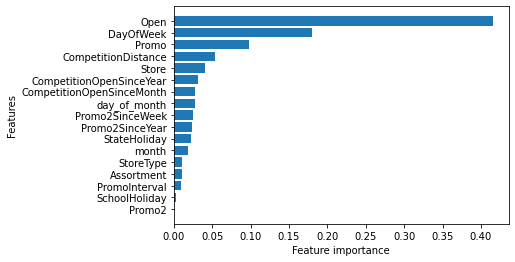

In [191]:
plot_features(X_train.columns, ideal_model.feature_importances_)